In [1]:
import h5py
import psana
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import  rotate
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize
import multiprocessing
import os
from functools import partial
import time
import sys
import argparse
from datetime import datetime
import tempfile
import XSpect.XSpect_Analysis
import XSpect.XSpect_Controller
import XSpect.XSpect_Visualization


<font size=5>XES Analysis and Visualization Test</font>

In [2]:
xes_experiment = XSpect.XSpect_Analysis.spectroscopy_experiment(hutch='xcs',experiment_id='xcsc00121',lcls_run=21)
xes=XSpect.XSpect_Controller.XESBatchAnalysisRotation()
xes.end_index=5000
xes.mintime=-1
xes.maxtime=99
xes.numpoints=100
xes.angle=1.3
xes.set_key_aliases()
xes.rois=[[35,65],[120,150]]
#xes.add_filter('xray','ipm4',1.0E3)
#xes.add_filter('simultaneous','ipm4',1.0E3)
#xes.add_filter('simultaneous','time_tool_ampl',0.15)
xes.run_parser(['216'])

In [3]:
start=time.time()
#xes.primary_analysis_parallel_loop(4,xes_experiment)
xes.primary_analysis_loop(xes_experiment)
end=time.time()

(3547, 704, 216)
(1417, 704, 216)


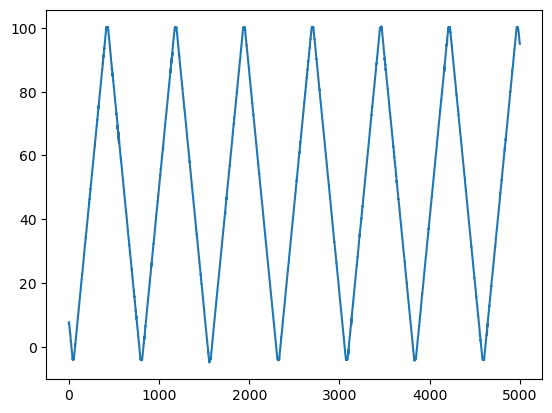

In [4]:
plt.plot(xes.analyzed_runs[0].delays)

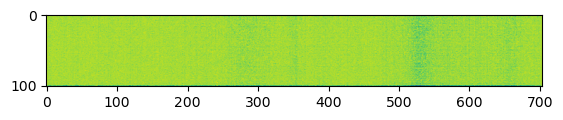

In [5]:
plt.imshow(xes.analyzed_runs[0].epix_xray_not_laser_time_binned_ROI_1-xes.analyzed_runs[0].epix_simultaneous_laser_time_binned_ROI_1)

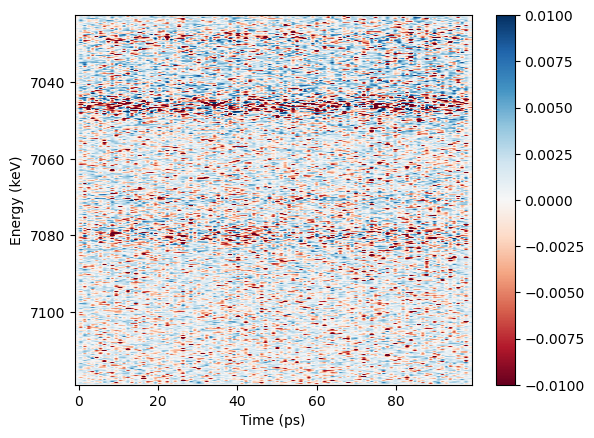

In [6]:
np.shape(xes.analyzed_runs[0].epix_simultaneous_laser_time_binned_ROI_1)
v=XSpect.XSpect_Visualization.XESVisualization()
v.combine_spectra(xes_analysis=xes,xes_key='epix_xray_not_laser_time_binned_ROI_1',xes_laser_key='epix_simultaneous_laser_time_binned_ROI_1')
v.vmin=-0.01
v.vmax=0.01
v.plot_2d_difference_spectrum(xes)

In [9]:
for j,k in zip(xes.analyzed_runs[0].status_datetime,xes.analyzed_runs[0].status):
    print(j,k)

2024-01-21 22:56:26 New
2024-01-21 22:56:26 Obtained shot properties
2024-01-21 22:56:28 HDF5 import of keys completed. Time: 1.93 seconds
2024-01-21 22:56:29 HDF5 import of keys completed kept as hdf5 dataset. Time: 1.21 seconds
2024-01-21 22:58:03 Shots combined for detector epix on filters: simultaneous and laser into epix_simultaneous_laser
2024-01-21 22:58:04 Shots (1417) separated for detector epix on filters: xray and laser into epix_xray_laser
2024-01-21 22:58:04 Generated timing bins from -1.000000 to 99.000000 in 100 steps.
2024-01-21 22:58:04 Shots combined for detector timing_bin_indices on filters: simultaneous and laser into timing_bin_indices_simultaneous_laser
2024-01-21 22:58:04 Shots (1417) separated for detector timing_bin_indices on filters: xray and laser into timing_bin_indices_xray_laser
2024-01-21 22:58:49 Detector epix_simultaneous_laser binned in time into key: epix_simultaneous_laser_time_binned
2024-01-21 22:59:07 Detector epix_xray_not_laser binned in time 

In [10]:
np.save('XES_Rotation_Time_Domain.npy',xes.difference_spectrum)